# Exercises

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

file_name = '../data/unit_08/athletes.csv'

In [3]:
df = pd.read_csv(file_name)
df['dob'] = pd.to_datetime(df['dob'])

In [4]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0


## 1. What was the average age in male and female athletes?

In [5]:
df['age'] = datetime.now() - df['dob']
avg_age = df[['sex','age']].groupby('sex').apply(lambda x: x['age'].mean().days/365)
avg_age

sex
female    26.610959
male      27.243836
dtype: float64

## 2. What are the most common Dates of Birth?

In [6]:
df['dob'].mode()

0   1988-03-05
1   1990-12-20
2   1993-02-18
dtype: datetime64[ns]

## 3. How about the most common birthdays?

In [7]:
common_bdays = []

for value in df['dob'].apply(lambda x: (x.month, x.day)).mode():
    common_bdays.append(datetime(month=value[0], day=value[1], year=1900).strftime('%B %d'))

print (common_bdays)

['January 01']


## 4. What are the Countries with more than 100 medals?

In [53]:
team = ['football','hockey','volleyball','handball','rugby sevens','basketball']

individual = ['judo','shooting','wrestling','boxing','weightlifting',
              'taekwondo','golf','triathlon','modern pentathlon']

mixed = ['cycling','athletics','aquatics','rowing','sailing','canoe','gymnastics',
         'fencing','tennis','table tennis','badminton','archery','equestrian']

# there is no data to separate individual vs team events, 
# so the total set count will be inflated

In [94]:
no_medals = ((df['gold'] == 0) & (df['silver'] == 0) & (df['bronze'] == 0))

team_sports = df['sport'].isin(team)
individual_sports = df['sport'].isin(individual)
mixed_sports = df['sport'].isin(mixed)

awarded_teams = df[(-no_medals) & (team_sports)]
awarded_individuals = df[(-no_medals) & (individual_sports)]
awarded_mixeds = df[(-no_medals) & (mixed_sports)]

df_medal_sets = awarded_teams[['sport','nationality','sex','gold','silver','bronze']].\
groupby(['sport','nationality','sex']).max().reset_index()

df_medal_sets = pd.concat([df_medal_sets, awarded_individuals[['sport','nationality','sex','gold','silver','bronze']]])
df_medal_sets = pd.concat([df_medal_sets, awarded_mixeds[['sport','nationality','sex','gold','silver','bronze']]])

df_medal_sets['total_medals'] = df['gold'] + df['silver'] + df['bronze']

df_country_medal_sets = df_medal_sets[['nationality','total_medals']].groupby('nationality').sum().reset_index()
df_country_medal_sets[df_country_medal_sets['total_medals'] > 100].sort('total_medals', ascending=False)

,nationality,total_medals
83,USA,214
29,GBR,117
14,CHN,101


In [95]:
# OR... if the measure is how many people had a medal around their neck

df_country_medals = df[['sport','nationality','sex','gold','silver','bronze']]
df_country_medals['total_medals'] = df_country_medals['gold'] + df_country_medals['silver'] + df_country_medals['bronze']
df_country_medals = df_country_medals[['nationality','total_medals']].groupby('nationality').sum().reset_index()
df_country_medals[df_country_medals['total_medals'] > 100].sort('total_medals', ascending=False)

,nationality,total_medals
198,USA,264
72,GER,160
68,GBR,145
159,RUS,115
38,CHN,113


## 5. Create a bar or pie chart for the results of the previous exercise.

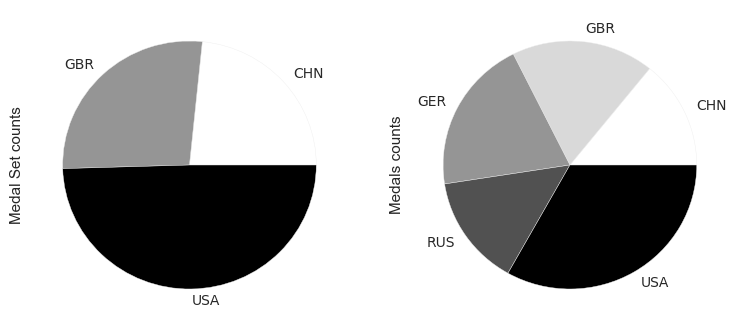

In [104]:
sr_country_sets = pd.Series(
        df_country_medal_sets[df_country_medal_sets['total_medals'] > 100]['total_medals'].values,
        name = 'Medal Set counts')
sr_country_sets.index = df_country_medal_sets[df_country_medal_sets['total_medals'] > 100]['nationality'].values

sr_country_medals = pd.Series(
    df_country_medals[df_country_medals['total_medals'] > 100]['total_medals'].values,
    name = 'Medals counts')
sr_country_medals.index = df_country_medals[df_country_medals['total_medals'] > 100]['nationality'].values

fig, axs = plt.subplots(1,2, figsize=(9,4))
sr_country_sets.plot.pie(ax=axs[0], colormap='Greys');
sr_country_medals.plot.pie(ax=axs[1], colormap='Greys');

## 6. Male weightlifting competitions are divided into 8 weight classes. Can you estimate these weight classes by looking at the data? Hint: Create a scatter plot with Body weight on the x-axis and choose height as y.

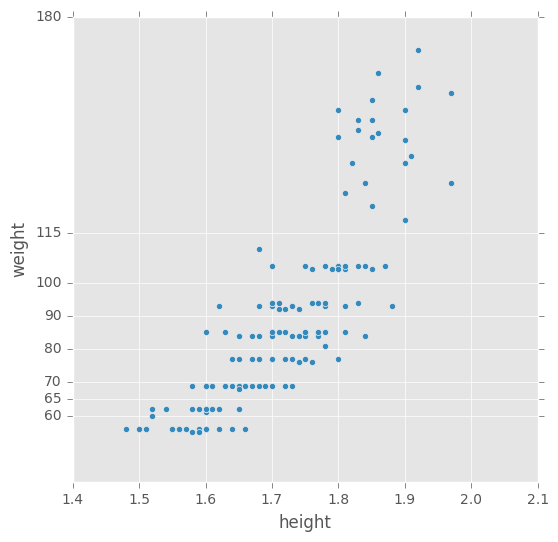

In [10]:
df_m_wghtlift = df[(df['sex']=='male') & (df['sport']=='weightlifting')]

fig, ax = plt.subplots(figsize = (6,6))
df_m_wghtlift.plot.scatter(x = 'height', y='weight', ax=ax);
ax.set_yticks([60,65,70,80,90,100,115,180]);


In [11]:
df_m_wghtlift['Weight_cat'] = 0
df_m_wghtlift.ix[df_m_wghtlift['weight'] < 60 ,'Weight_cat'] = 1
df_m_wghtlift.ix[(df_m_wghtlift['weight'] >= 60) & (df_m_wghtlift['weight'] < 65),'Weight_cat'] = 2
df_m_wghtlift.ix[(df_m_wghtlift['weight'] >= 65) & (df_m_wghtlift['weight'] < 70),'Weight_cat'] = 3
df_m_wghtlift.ix[(df_m_wghtlift['weight'] >= 70) & (df_m_wghtlift['weight'] < 80),'Weight_cat'] = 4
df_m_wghtlift.ix[(df_m_wghtlift['weight'] >= 80) & (df_m_wghtlift['weight'] < 90),'Weight_cat'] = 5
df_m_wghtlift.ix[(df_m_wghtlift['weight'] >= 90) & (df_m_wghtlift['weight'] < 100),'Weight_cat'] = 6
df_m_wghtlift.ix[(df_m_wghtlift['weight'] >= 100) & (df_m_wghtlift['weight'] < 115),'Weight_cat'] = 7
df_m_wghtlift.ix[df_m_wghtlift['weight'] >= 115,'Weight_cat'] = 8
df_m_wghtlift['Weight_cat'].value_counts()

5    24
8    22
3    22
6    19
1    19
7    18
2    17
4    13
Name: Weight_cat, dtype: int64

## 7. Generate a histogram of male and female height distribution among all participants.

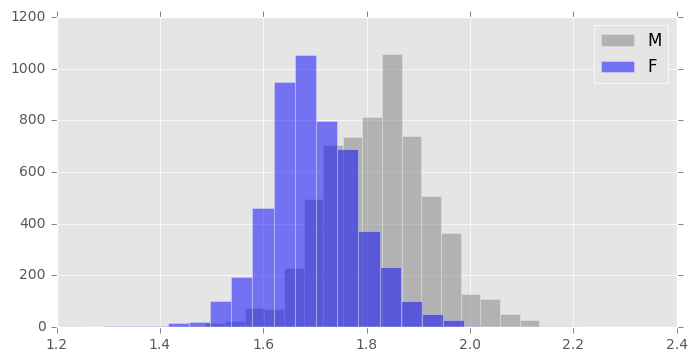

In [12]:
fig, ax = plt.subplots(figsize = (8,4))
df[df['sex']=='male']['height'].hist(bins=20, ax = ax, color='grey', alpha = .5, label='M')
df[df['sex']=='female']['height'].hist(bins=20, ax = ax, color='blue', alpha = .5, label='F')
ax.legend();

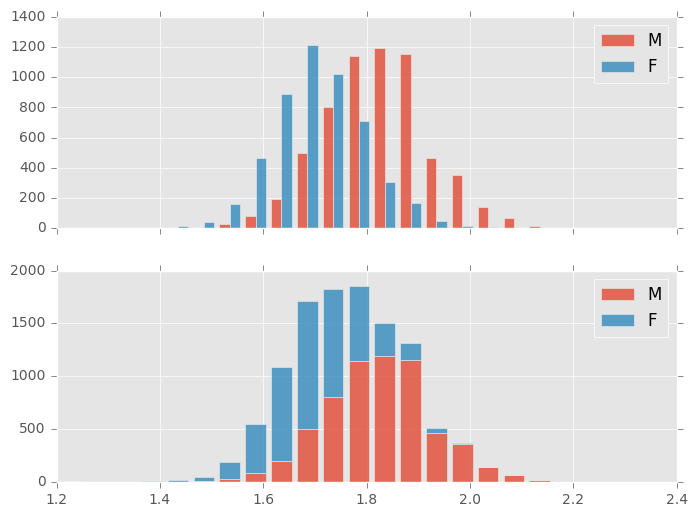

In [13]:
fig, axs = plt.subplots(2,1, figsize = (8,6), sharex=True)
axs[0].hist([
    list(df[(df['sex']=='male') & (df['height'].notnull())]['height']), 
    list(df[(df['sex']=='female') & (df['height'].notnull())]['height'])], 
    histtype='bar', bins=20, alpha = .8, 
    label=['M','F'])
axs[0].legend();

axs[1].hist([
    list(df[(df['sex']=='male') & (df['height'].notnull())]['height']), 
    list(df[(df['sex']=='female') & (df['height'].notnull())]['height'])], 
    histtype='bar', bins=20, alpha = .8, 
    label=['M','F'], stacked=True)
axs[1].legend();

## 8. Using the Seaborn package create a box plot for male and female height distribution among all participants.

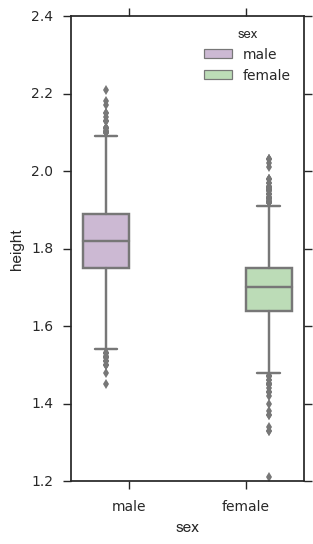

In [14]:
import seaborn as sns

#sns.set_style("whitegrid")
sns.set(style="ticks")

plt.figure(figsize=(3, 6))
sns.boxplot(x = 'sex', y = 'height', data=df[['sex','height']], hue="sex", palette="PRGn");

## 9. Create a world map for countries and their respective amount of medals in Carto. [Carto](http://carto.com) provides a quick and easy way to create maps. For this you will also need to use 'countries.csv'.

## 10. _Optional_: What else would you try?

#### Female / male ratio in individual sport

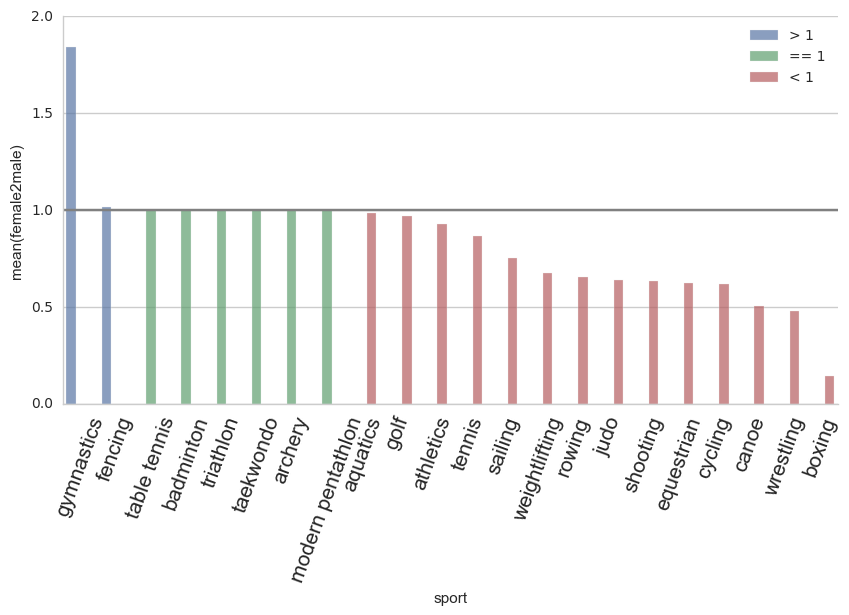

In [118]:
sport_data = []
for name, group in df[(individual_sports) | (mixed_sports)].groupby('sport'):
    sport_data.append([name, len(group[group['sex']=='female'])/ len(group[group['sex']=='male'])])
    
df_sport = pd.DataFrame(sport_data, columns = ['sport','female2male']).sort('female2male', ascending=False)
df_sport['color'] = [('green' if x>1 else ('blue' if x==1 else 'red')) for x in df_sport['female2male'].values]

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(data=df_sport, x='sport', y='female2male', hue='color', ax=ax, alpha = .7)
ax.set_xticklabels(df_sport['sport'], rotation=70, size=15)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['> 1','== 1', '< 1'])

plt.axhline(1, color='grey')

sns.despine()

#### Is there any relationship between BMI (body mass index) and Award(s) in individual sports?

In [122]:
df_bmi = df[((individual_sports) | (mixed_sports)) & (-no_medals)].apply(
    lambda x: pd.Series([
        x['sport'],
        x['weight'] / (x['height']**2),
        x['gold'], x['silver'], x['bronze'],
        x['gold'] + x['silver'] + x['bronze'],
        x['gold']*5 + x['silver']*3 + x['bronze']*2,
        (x['gold'] + x['silver'] + x['bronze'])!=0]),
    axis=1)

df_bmi.columns = ['sport','bmi','gold','silver','bronze','medals','weighted_medals','awarded']
df_bmi.head()

,sport,bmi,gold,silver,bronze,medals,weighted_medals,awarded
2,athletics,20.151005,0,0,1,1,2,True
14,aquatics,21.461937,1,1,0,2,8,True
48,taekwondo,22.871012,0,1,0,1,3,True
55,shooting,25.082863,0,0,1,1,2,True
60,wrestling,27.450605,1,0,0,1,5,True


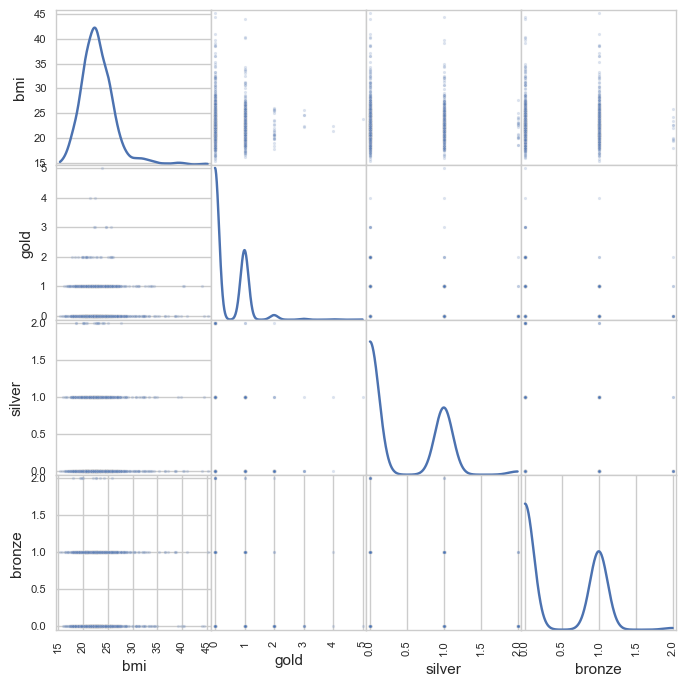

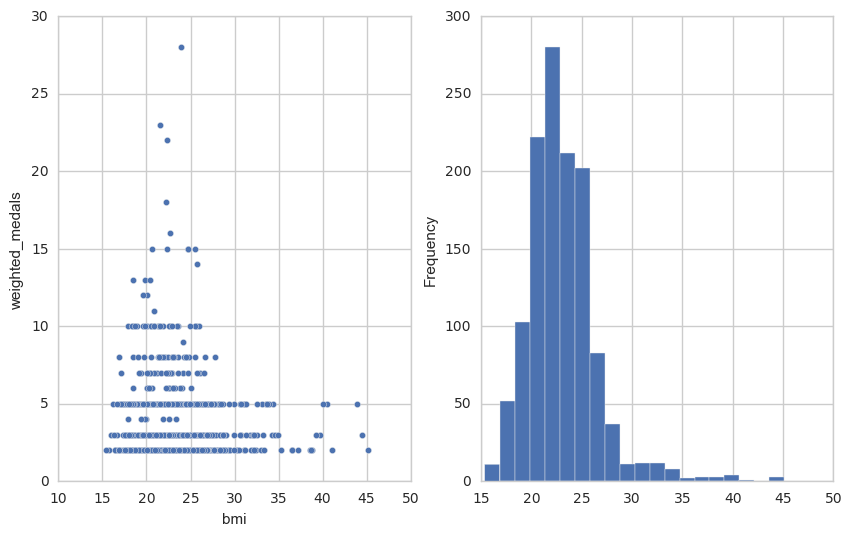

In [133]:
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(df_bmi[['bmi','gold','silver','bronze']], alpha=0.2, figsize=(8,8), diagonal='kde');

fig, axs = plt.subplots(1,2,figsize = (10,6),)
df_bmi.plot.scatter(x='bmi', y='weighted_medals', ax=axs[0])
df_bmi['bmi'].plot.hist(bins=20, ax = axs[1]);

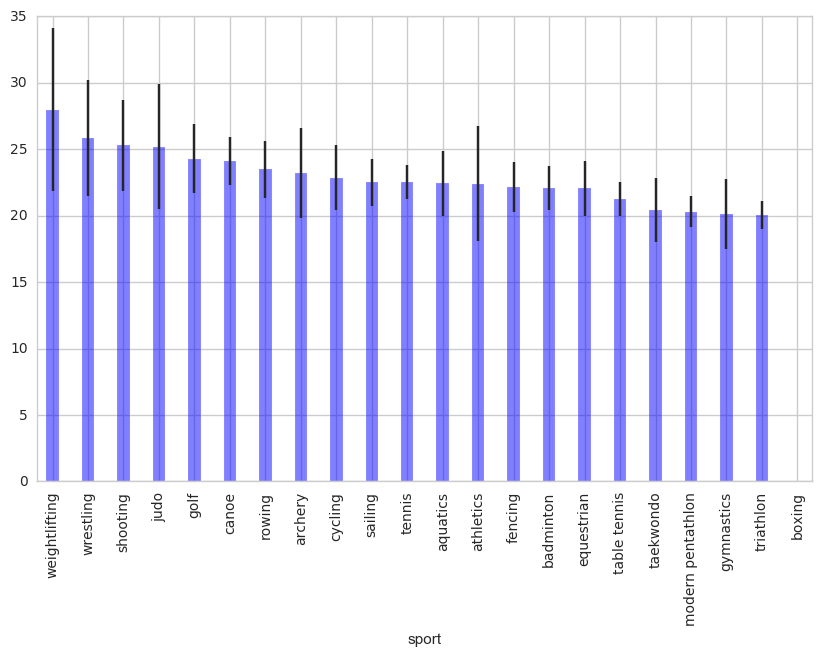

In [132]:
bmi_data = []
for name, group in df_bmi.groupby('sport'):
    bmi_data.append([name,
                     np.mean(group['bmi']),
                     np.std(group['bmi'], ddof=1),
                     np.mean(group['weighted_medals']),
                     np.std(group['weighted_medals'], ddof=1)])

df_bmi_dist = pd.DataFrame(bmi_data, columns = ['sport','bmi_mean','bmi_std','weighted_mean','weighted_std'])
df_bmi_dist = df_bmi_dist.sort('bmi_mean', ascending=False)

width = 0.35

fig, axs = plt.subplots(figsize = (10,6), sharex=True)

df_bmi_dist.plot(
    kind='bar',
    x = 'sport',
    y = 'bmi_mean',
    ax=axs,
    width=width, 
    yerr = 'bmi_std',
    color='blue', 
    alpha = .5, legend = False);
